# Business Questions for Exploratory Data Analysis with 'Price' as the Target Variable

### 1. Categorical Variable Impact on Price 
- **Question:** Is there a brand premium in the electric vehicle market? Which brands command higher prices, and why?
- **Objective:** Analyze the average prices by brand to determine if certain brands are perceived as more premium or offer better value, influencing consumer choice and brand strategy.
-  **Question:** Does the type of drive system (e.g., All Wheel Drive vs. Front Wheel Drive) affect the pricing of electric vehicles?
- **Objective:** Understand if drive types are associated with price variations, possibly due to performance differences, to guide production decisions and target market segments.
  
### 2. Numerical Variable Influence on Price
- **Question:** How does each technical specification (e.g., Usable Battery (kWh), Acceleration (sec), TopSpeed (km/h), Range (km), Efficiency (Wh/km), FastChargeSpeed (km/h)) influence the price of an electric vehicle?
- **Objective:** Identify which specifications most significantly impact the price to determine focus areas for product development and marketing strategies.

### 3. Multiple Linear regression Predict PriceinGermany
- **Question:** How sensitive is the price to all variables?
- **Objective:** Determine the factors influence price.


In [261]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

## Data Cleaning and Manipulation

In [15]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Cheapestelectriccars-EVDatabase 2023.csv', 'EV2023.csv', 'EV_EDA.ipynb']


In [27]:
import os
file_path = os.path.join(os.getcwd(), 'EV2023.csv')
print("Trying to open:", file_path)
raw_df = pd.read_csv(file_path)

Trying to open: C:\Users\juewa\DS Projects\EV\EV2023.csv


In [31]:
raw_df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN


<Axes: >

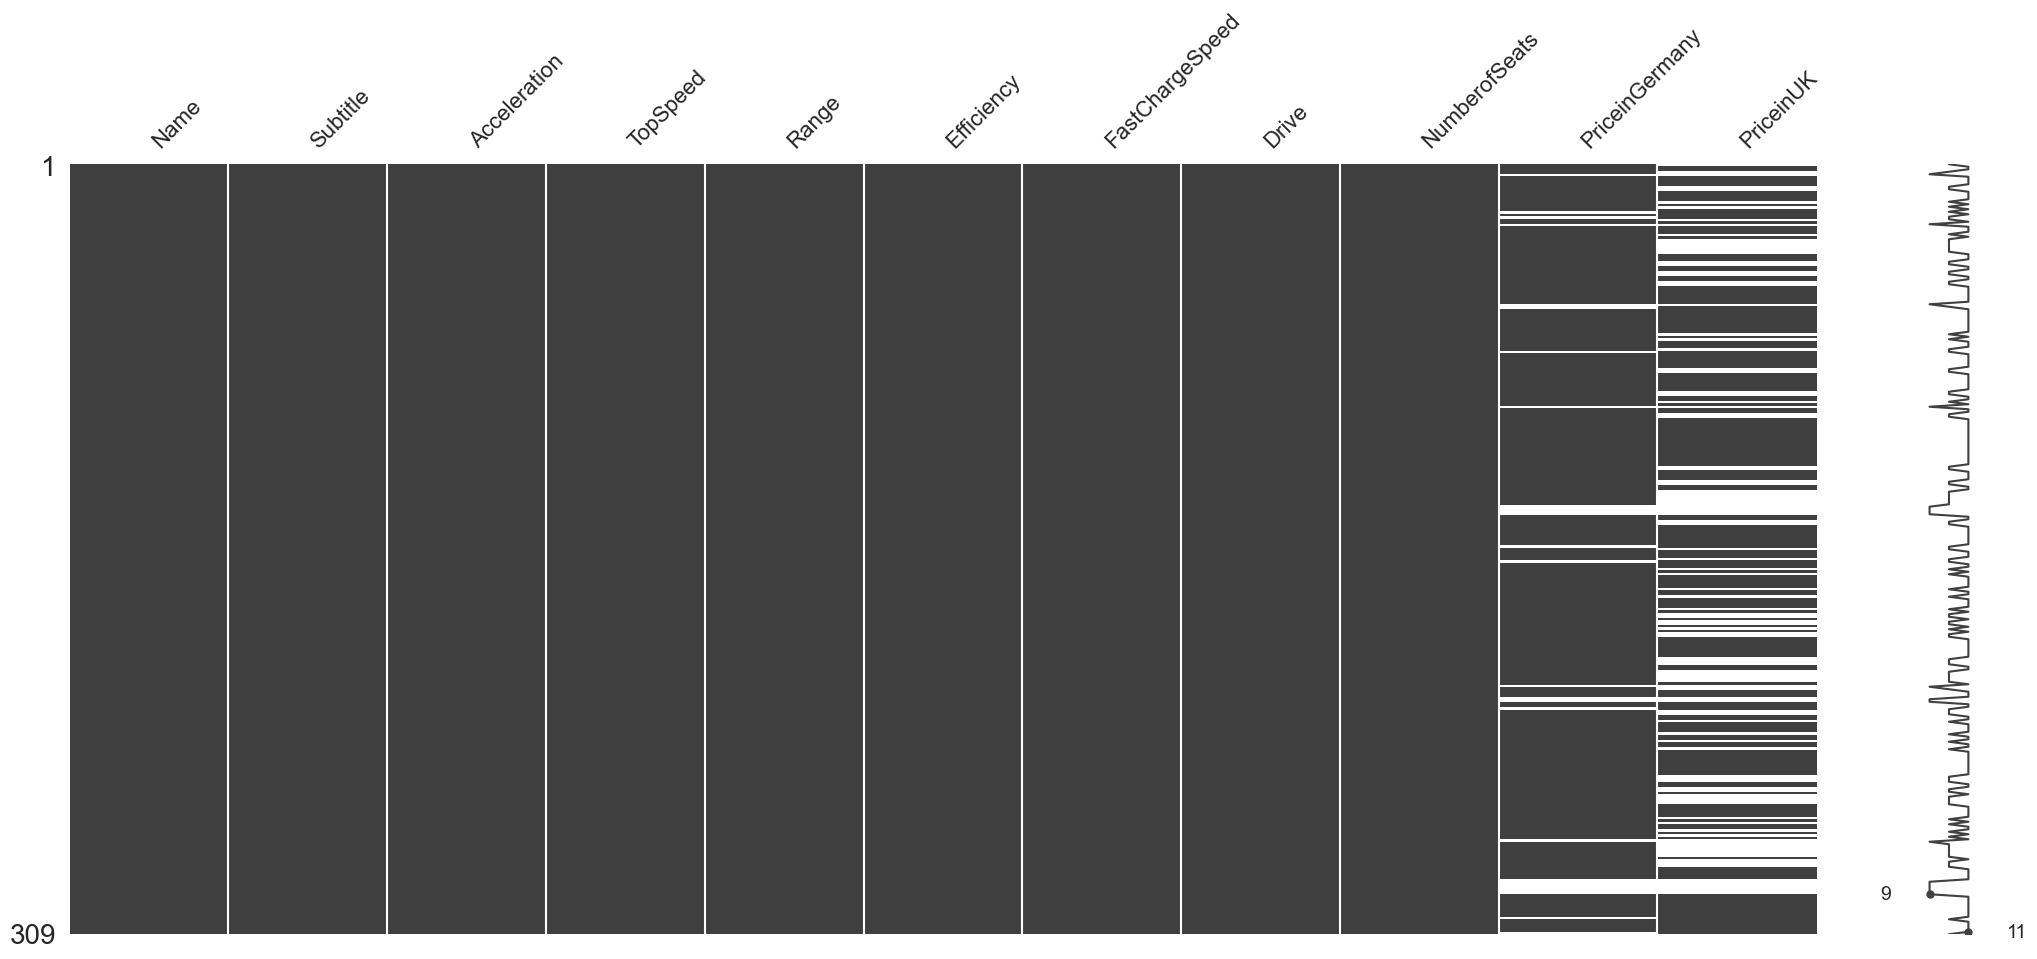

In [81]:
import missingno as msno
msno.matrix(raw_df)

In [33]:
# Check for missing values in the DataFrame
print("Missing values in each column:")
print(raw_df.isnull().sum())

# Drop rows with any missing values
df = raw_df.drop(columns=['PriceinUK'])

# Check the DataFrame after removing missing values
print("\nDataFrame after removing rows with missing values:")

Missing values in each column:
Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
PriceinUK          111
dtype: int64

DataFrame after removing rows with missing values:


In [35]:
df = df[df['PriceinGermany'].notna()]
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000"
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840"
5,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7 sec,250 km/h,415 km,181 Wh/km,640 km/h,All Wheel Drive,5,"€63,667"


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    282 non-null    object 
 1   Drive                   282 non-null    object 
 2   NumberofSeats           282 non-null    int64  
 3   PriceinGermany          282 non-null    object 
 4   Brand                   282 non-null    object 
 5   Usable Battery (kWh)    282 non-null    object 
 6   Acceleration (sec)      282 non-null    float64
 7   TopSpeed (km/h)         282 non-null    float64
 8   Range (km)              282 non-null    float64
 9   Efficiency (Wh/km)      282 non-null    float64
 10  FastChargeSpeed (km/h)  279 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 26.4+ KB


In [41]:
# 1. Extracting Brand Name
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# 2. Extract usable battery in kWh from Subtitle and rename the column
df['Usable Battery (kWh)'] = df['Subtitle'].str.extract(r'(\d+.\d+|\d+) kWh')[0]
df.drop('Subtitle', axis=1, inplace=True)

# 3. Remove 'sec' from 'Acceleration' and rename the column
df['Acceleration (sec)'] = df['Acceleration'].str.replace(' sec', '', regex=False).astype(float)
df.drop('Acceleration', axis=1, inplace=True)

# 4. Clean numeric columns and rename with units
df['TopSpeed (km/h)'] = df['TopSpeed'].str.extract(r'(\d+)')[0].astype(float)
df['Range (km)'] = df['Range'].str.extract(r'(\d+)')[0].astype(float)
df['Efficiency (Wh/km)'] = df['Efficiency'].str.extract(r'(\d+)')[0].astype(float)
df['FastChargeSpeed (km/h)'] = df['FastChargeSpeed'].str.extract(r'(\d+)')[0].astype(float)

# Drop the old columns
df.drop(['TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed'], axis=1, inplace=True)

In [58]:
df.head()

,Name,Drive,NumberofSeats,PriceinGermany,Brand,Usable Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h)
0,Lucid Air Dream Edition P,All Wheel Drive,5,218000.0,Lucid,118.0,2.7,270.0,645.0,183.0,820.0
1,Porsche Taycan Turbo S,All Wheel Drive,4,189668.0,Porsche,83.7,2.8,260.0,400.0,209.0,980.0
2,Audi e-tron GT RS,All Wheel Drive,4,146050.0,Audi,85.0,3.3,250.0,405.0,210.0,1000.0
3,Renault Zoe ZE50 R110,Front Wheel Drive,5,36840.0,Renault,52.0,11.4,135.0,315.0,165.0,230.0
5,Tesla Model Y Performance,All Wheel Drive,5,63667.0,Tesla,75.0,3.7,250.0,415.0,181.0,640.0


In [56]:
# Removing the currency symbol and commas from 'PriceinGermany' and converting to float
df['PriceinGermany'] = df['PriceinGermany'].replace('[€,]', '', regex=True).astype(float)

# Converting 'Usable Battery (kWh)' to float
# Assuming it's a straightforward conversion without needing to remove any characters
df['Usable Battery (kWh)'] = pd.to_numeric(df['Usable Battery (kWh)'], errors='coerce')

# Checking the updated DataFrame dtypes
print(df.dtypes)

Name                       object
Drive                      object
NumberofSeats               int64
PriceinGermany            float64
Brand                      object
Usable Battery (kWh)      float64
Acceleration (sec)        float64
TopSpeed (km/h)           float64
Range (km)                float64
Efficiency (Wh/km)        float64
FastChargeSpeed (km/h)    float64
dtype: object


In [ ]:
# Convert all columns that should be numeric and coerce errors to NaN
numeric_columns = df.select_dtypes(include='number').columns  # Gets all numeric columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in these numeric columns
df = df.dropna(subset=numeric_columns)

# Print the DataFrame to verify changes
df.head()

In [62]:
df.describe()

,NumberofSeats,PriceinGermany,Usable Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h)
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,5.308244,71534.376344,71.976703,7.407527,182.236559,366.666667,199.297491,549.856631
std,0.954902,41679.433706,20.599937,3.128653,39.326451,108.638566,32.809693,246.801075
min,4.000000,22550.000000,21.300000,2.100000,125.000000,135.000000,150.000000,150.000000
25%,5.000000,47245.000000,58.000000,4.850000,152.500000,295.000000,174.000000,330.000000
50%,5.000000,58990.000000,74.000000,7.000000,180.000000,380.000000,192.000000,500.000000
75%,5.000000,79600.000000,86.500000,9.000000,207.500000,440.000000,214.000000,680.000000
max,7.000000,400000.000000,123.000000,19.100000,320.000000,685.000000,295.000000,1240.000000


## Exploratory Data Analysis

### 1. Count Distribution Pie Chart

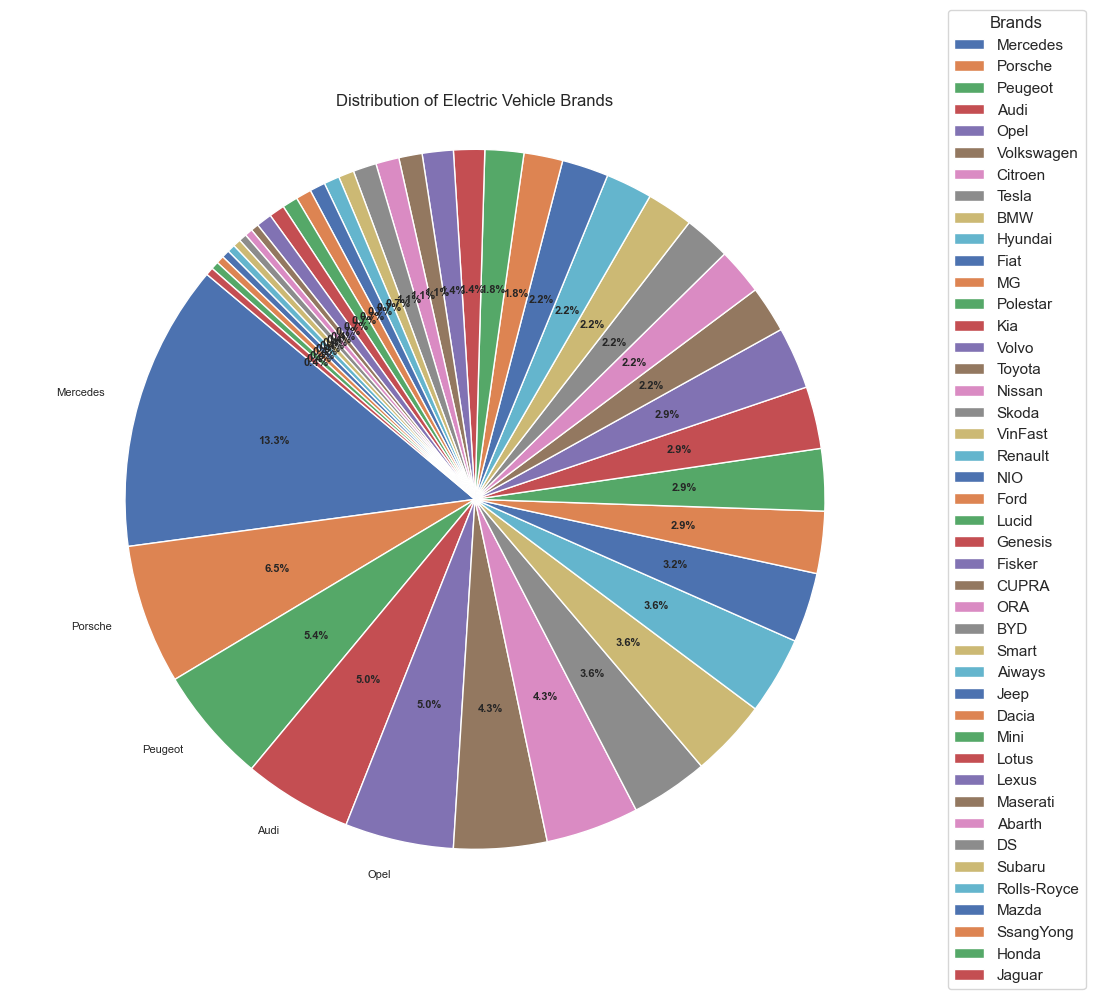

In [77]:
# Count the number of instances for each brand
brand_counts = df['Brand'].value_counts()

# Set a threshold for displaying labels on the pie chart
threshold = 0.05  # 5% of the total
labels = [label if value > threshold * brand_counts.sum() else '' for label, value in zip(brand_counts.index, brand_counts)]

# Generate a pie chart
plt.figure(figsize=(12, 10))  # Increased figure size for better clarity
wedges, texts, autotexts = plt.pie(brand_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Improve label display
plt.setp(texts, size=8)  # Set smaller text size for less overlap
plt.setp(autotexts, size=8, weight="bold")  # Bold the autotext to make it more readable

# Include a legend for brands that don't meet the threshold
plt.legend(wedges, brand_counts.index, title="Brands", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Electric Vehicle Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [115]:
# Choose the top 5 brands that hold the most records in the dataset.

top_n = 5

# Find the top N brands
top_brands = df['Brand'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only the top N brands
top_df = df[df['Brand'].isin(top_brands)]

## 2. Categorical Variable Analysis

## Relationship of Categorical X Variables with Target Y Variable Y

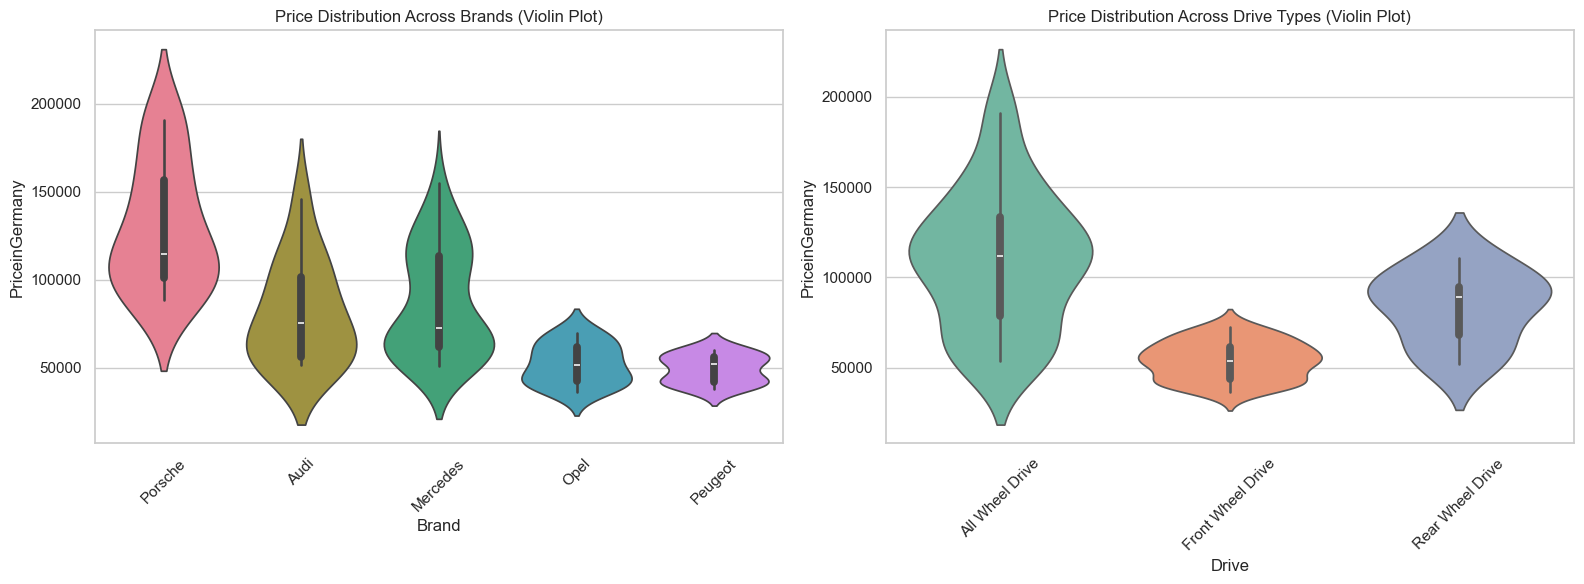

In [125]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Violin plot of Price across different Brands with color
sns.violinplot(x='Brand', y='PriceinGermany', data=top_df, palette="husl", ax=axes[0])
axes[0].set_title('Price Distribution Across Brands (Violin Plot)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate x-axis labels

# Violin plot of Price across different Drive types with color
sns.violinplot(x='Drive', y='PriceinGermany', data=top_df, palette="Set2", ax=axes[1])
axes[1].set_title('Price Distribution Across Drive Types (Violin Plot)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  # Rotate x-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [129]:
# Group by categorical X and calculate summary statistics for numeric Y
category_stats = top_df.groupby('Brand')['PriceinGermany'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print(category_stats)

                   mean    median           std      min       max  count
Brand                                                                    
Audi       81035.000000   75525.0  28955.473709  51900.0  146050.0     14
Mercedes   87254.810811   72519.0  30631.913764  50777.0  155009.0     37
Opel       52216.357143   51408.5  11448.228305  36395.0   70075.0     14
Peugeot    49400.666667   51940.0   8045.441004  37900.0   60430.0     15
Porsche   130015.944444  114865.0  35699.710359  88399.0  191096.0     18


### General Observations - Brand:
- **Porsche** has the highest mean and median prices, suggesting it's a more premium brand with a wide range of prices. The high standard deviation indicates significant price variation across different models.
- **Mercedes** also has a wide range of prices, but with a lower median than Porsche, suggesting it offers more mid-range options alongside its luxury models.
- **Opel** and **Peugeot** are more affordable brands, with lower means and standard deviations, indicating more consistent, tightly clustered prices.
- **Audi** sits somewhere in the middle, with moderate variation in prices but with some high-end vehicles.

In [228]:
# Group by categorical X and calculate summary statistics for numeric Y
category_stats = top_df.groupby('Drive')['PriceinGermany'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print(category_stats)

                            mean    median           std      min       max  \
Drive                                                                         
All Wheel Drive    109591.239130  111679.5  37761.870879  53746.0  191096.0   
Front Wheel Drive   54008.195122   53640.0  10480.076265  36395.0   72519.0   
Rear Wheel Drive    83610.090909   89351.0  20285.072326  51900.0  110801.0   

                   count  
Drive                     
All Wheel Drive       46  
Front Wheel Drive     41  
Rear Wheel Drive      11  


### General Observations - Drive:
- **All Wheel Drive** vehicles have the highest mean price (€109,591) and the widest price range, with a maximum of €191,096. The high standard deviation indicates substantial variation in prices across models with this drive type. The median (€111,679) is close to the mean, indicating a relatively symmetric distribution.
- **Rear Wheel Drive** vehicles have a mean price of €83,610, with a median higher than the mean (€89,351), suggesting a slight left skew, meaning that the more expensive models may be pulling the median higher. The standard deviation (€20,285) shows moderate price variation.
- **Front Wheel Drive** vehicles are the most affordable, with the lowest mean (€54,008) and median (€53,640). They also have the smallest standard deviation (€10,480), indicating that prices are tightly clustered and consistent across models.
- In general, **All Wheel Drive** vehicles tend to be the most expensive and varied in price, while **Front Wheel Drive** vehicles are more affordable with less price variation.


## ANOVA result for Brands and Drive Type

In [131]:
from scipy import stats

# ANOVA test for Price across Brands
anova_result = stats.f_oneway(*(top_df[top_df['Brand'] == brand]['PriceinGermany'] for brand in top_df['Brand'].unique()))
print('ANOVA result for Brands:', anova_result)

# ANOVA test for Price across Drive types
anova_result_drive = stats.f_oneway(*(top_df[top_df['Drive'] == drive]['PriceinGermany'] for drive in top_df['Drive'].unique()))
print('ANOVA result for Drive Types:', anova_result_drive)

ANOVA result for Brands: F_onewayResult(statistic=23.837141004382715, pvalue=1.3758861396248254e-13)
ANOVA result for Drive Types: F_onewayResult(statistic=43.773466179451795, pvalue=3.361867870220369e-14)


## ANOVA Results

### 1. ANOVA Result for Brands:
- **F-statistic:** 23.84
- **p-value:** 1.38e-13 (or 0.0000000000001376)

### 2. ANOVA Result for Drive Types:
- **F-statistic:** 43.77
- **p-value:** 3.36e-14 (or 0.0000000000000336)

## Interpretation:

### 1. Brands:
- The **F-statistic** of 23.84 indicates a significant difference between the means of prices across different brands.
- The **p-value** of 1.38e-13 is **extremely low**, much lower than the common significance level of 0.05. This suggests that there is **strong evidence** to reject the null hypothesis (which states that all brands have the same average price).
- **Conclusion:** The price of electric vehicles **varies significantly** between different brands.

### 2. Drive Types:
- The **F-statistic** of 43.77 suggests that the difference in the means of prices between different drive types is even more pronounced.
- The **p-value** of 3.36e-14 is also much lower than 0.05, indicating that the null hypothesis (that prices are the same for all drive types) can be rejected.
- **Conclusion:** There is a **significant difference** in prices between different drive types (e.g., All Wheel Drive vs. Front Wheel Drive).


## 3. Numeric x with Numeric Y

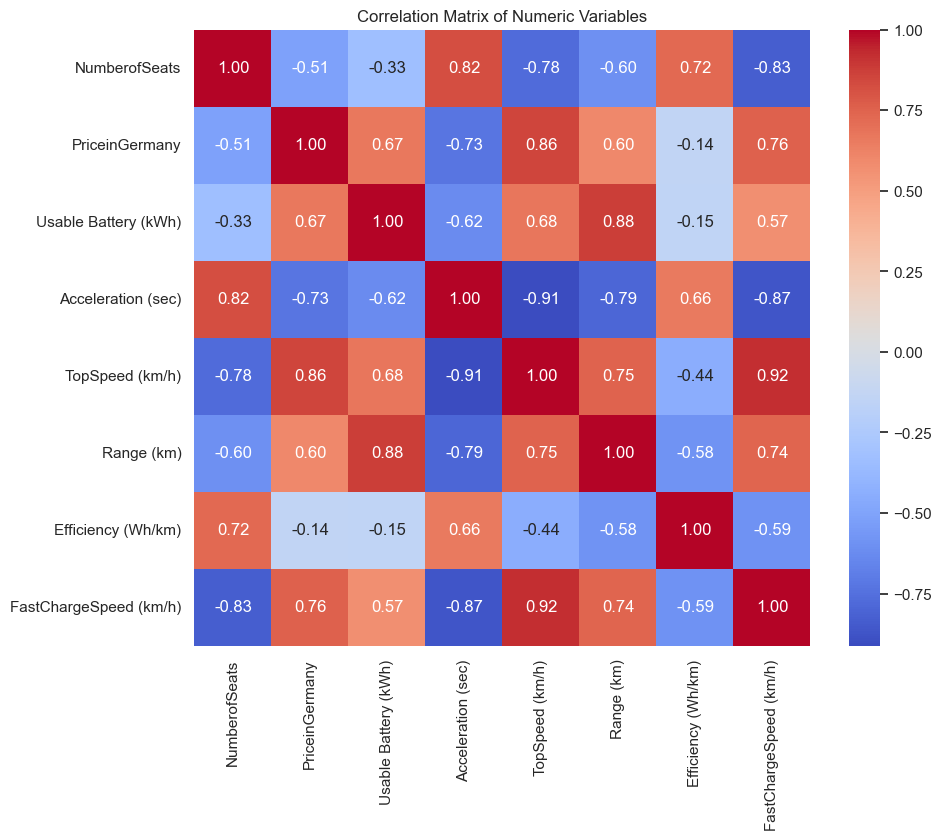

In [160]:
# Step 1: Select all numeric variables
numeric_df = top_df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### Make sure all X variables are independent

### Correlation Anlaysis

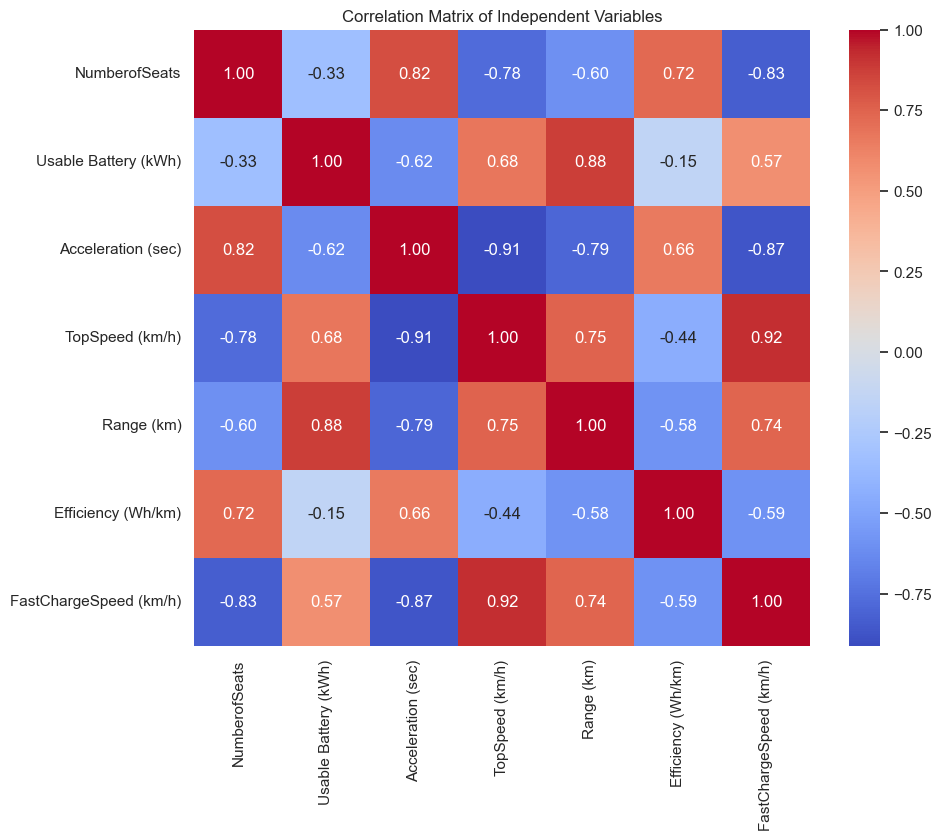

In [166]:
# Step 1: Compute the correlation matrix for X variables
X = numeric_df.drop(columns=['PriceinGermany'])  # Exclude the target variable
corr_matrix = X.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Step 1: Prepare the X variables (independent variables)
X = top_df.drop(columns=['PriceinGermany'])  # Exclude the target variable
X = X.select_dtypes(include=['number'])  # Only keep numeric variables

# Step 2: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 3: Print VIF values
print(vif_data)

                  Feature         VIF
0           NumberofSeats  117.616968
1    Usable Battery (kWh)  461.619019
2      Acceleration (sec)   87.219141
3         TopSpeed (km/h)  342.410200
4              Range (km)  440.426286
5      Efficiency (Wh/km)  620.335281
6  FastChargeSpeed (km/h)   62.438790


#### Observation from VIF: High multicollinearity

#### Principal Component Analysis (PCA) or Ridge/Lasso


## Ploting Numeric Variables X in Relationship with Target Variable Y

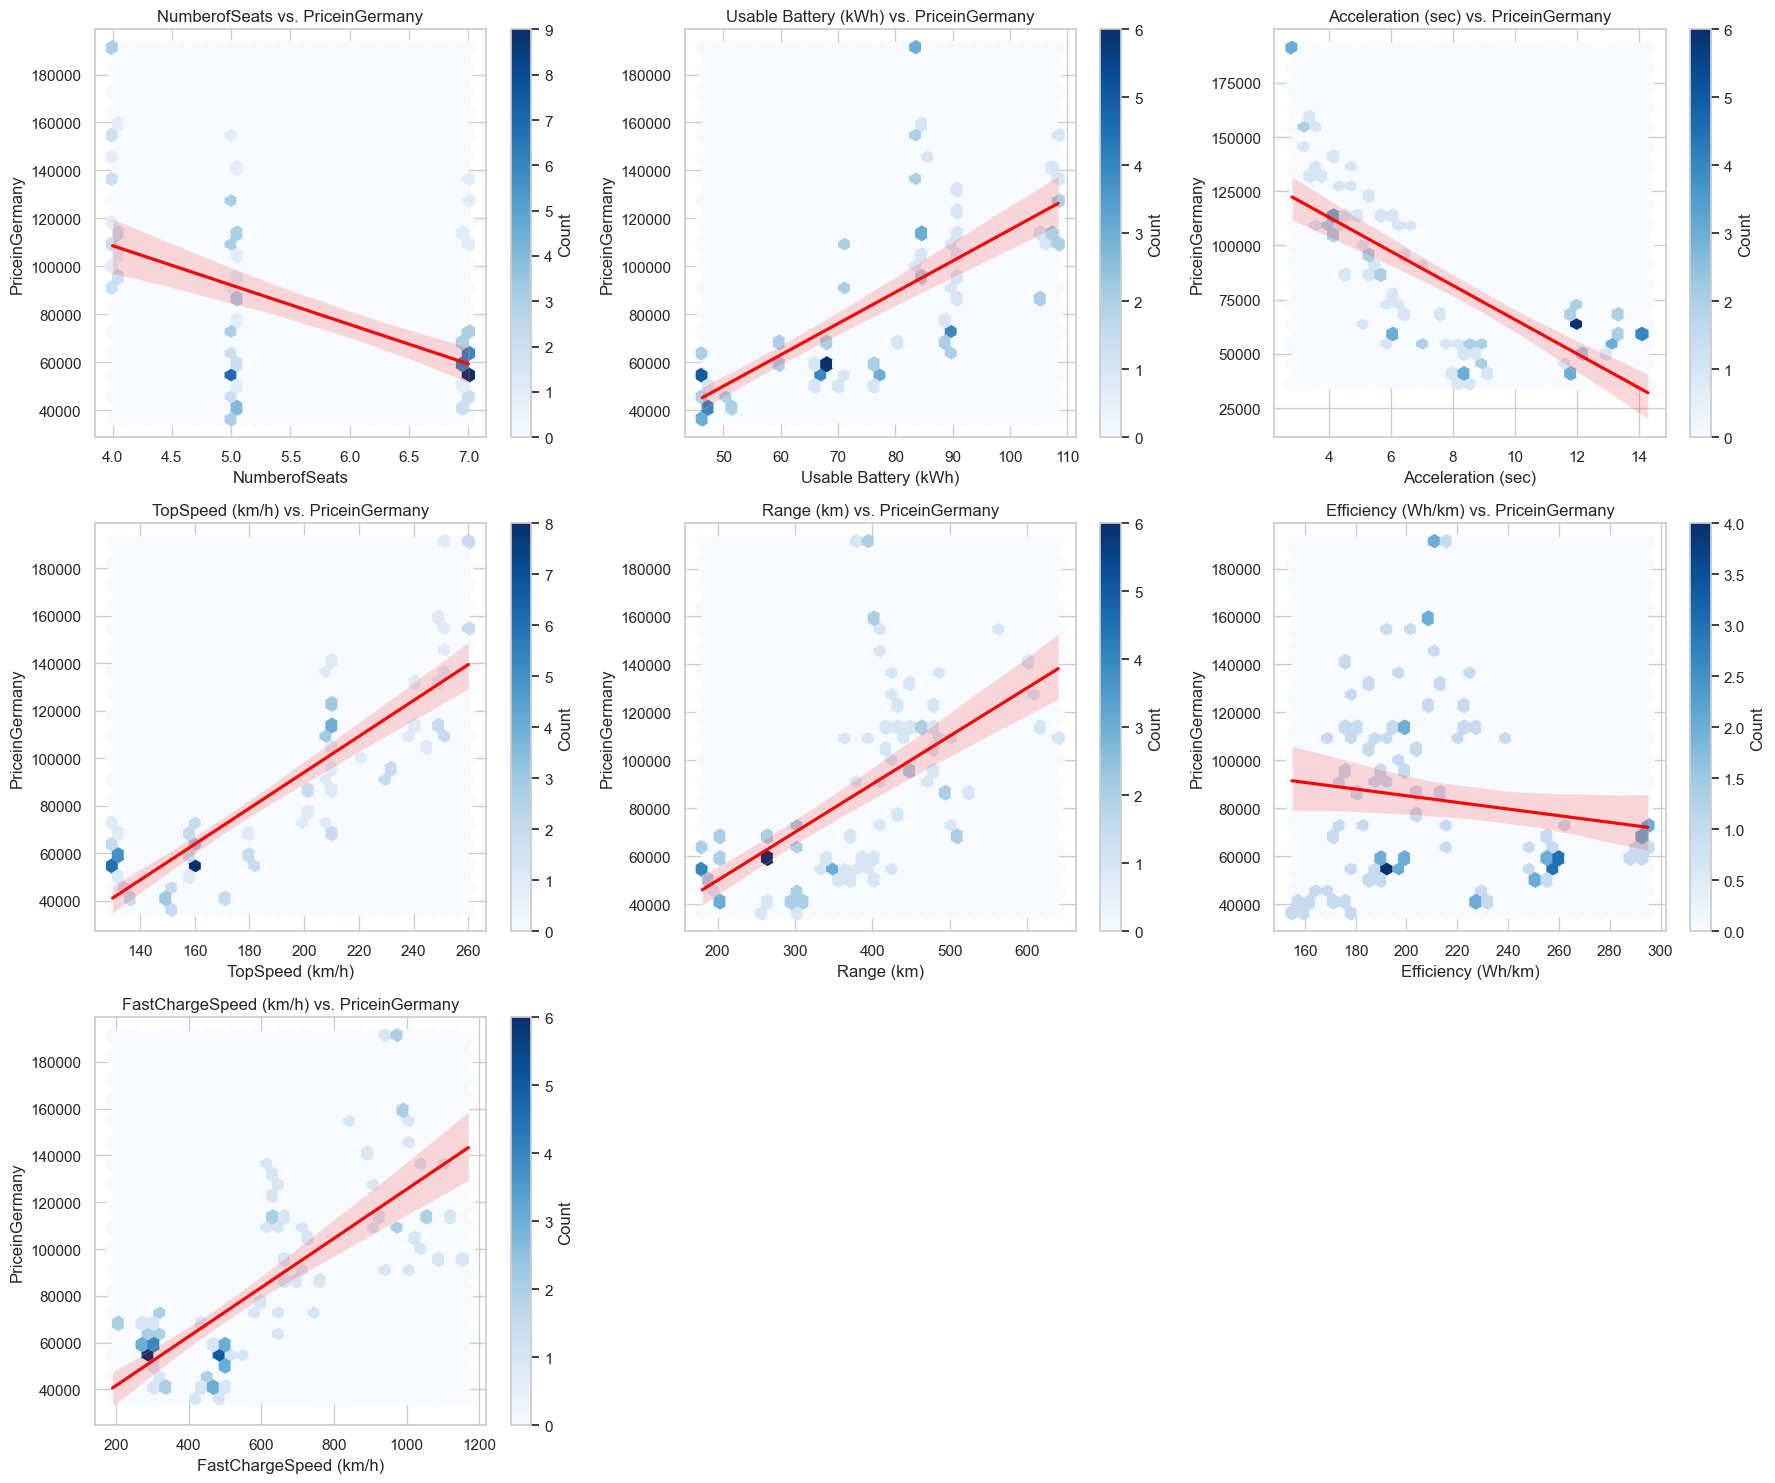

In [196]:
# Step 1: Select all numeric variables (excluding the target variable)
numeric_df2 = top_df.select_dtypes(include=['number']).drop(columns=['PriceinGermany'])
target_var = 'PriceinGermany'

# Step 2: Define the grid layout (e.g., 3 columns, calculate rows dynamically)
n_cols = 3  # Number of columns
n_rows = int(np.ceil(len(numeric_df2.columns) / n_cols))  # Correct calculation for number of rows

# Step 3: Create subplots for all numeric variables vs PriceinGermany
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))  # Adjust size based on layout

# Step 4: Flatten axes array for easy iteration
axes = axes.flatten()

# Step 5: Generate hexbin plots for each variable
for i, variable in enumerate(numeric_df2.columns):
    ax = axes[i]
    hb = ax.hexbin(x=top_df[variable], y=top_df[target_var], gridsize=30, cmap='Blues')
    ax.set_title(f'{variable} vs. {target_var}')
    ax.set_xlabel(variable)
    ax.set_ylabel(target_var)
    
    # Add colorbar to each hexbin plot
    cb = fig.colorbar(hb, ax=ax, label='Count')

    # Optional: Add trend line (regression line)
    sns.regplot(x=variable, y=target_var, data=top_df, scatter=False, ax=ax, color='red')

# Step 6: Remove any unused axes if necessary
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplot spaces if any

# Step 7: Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

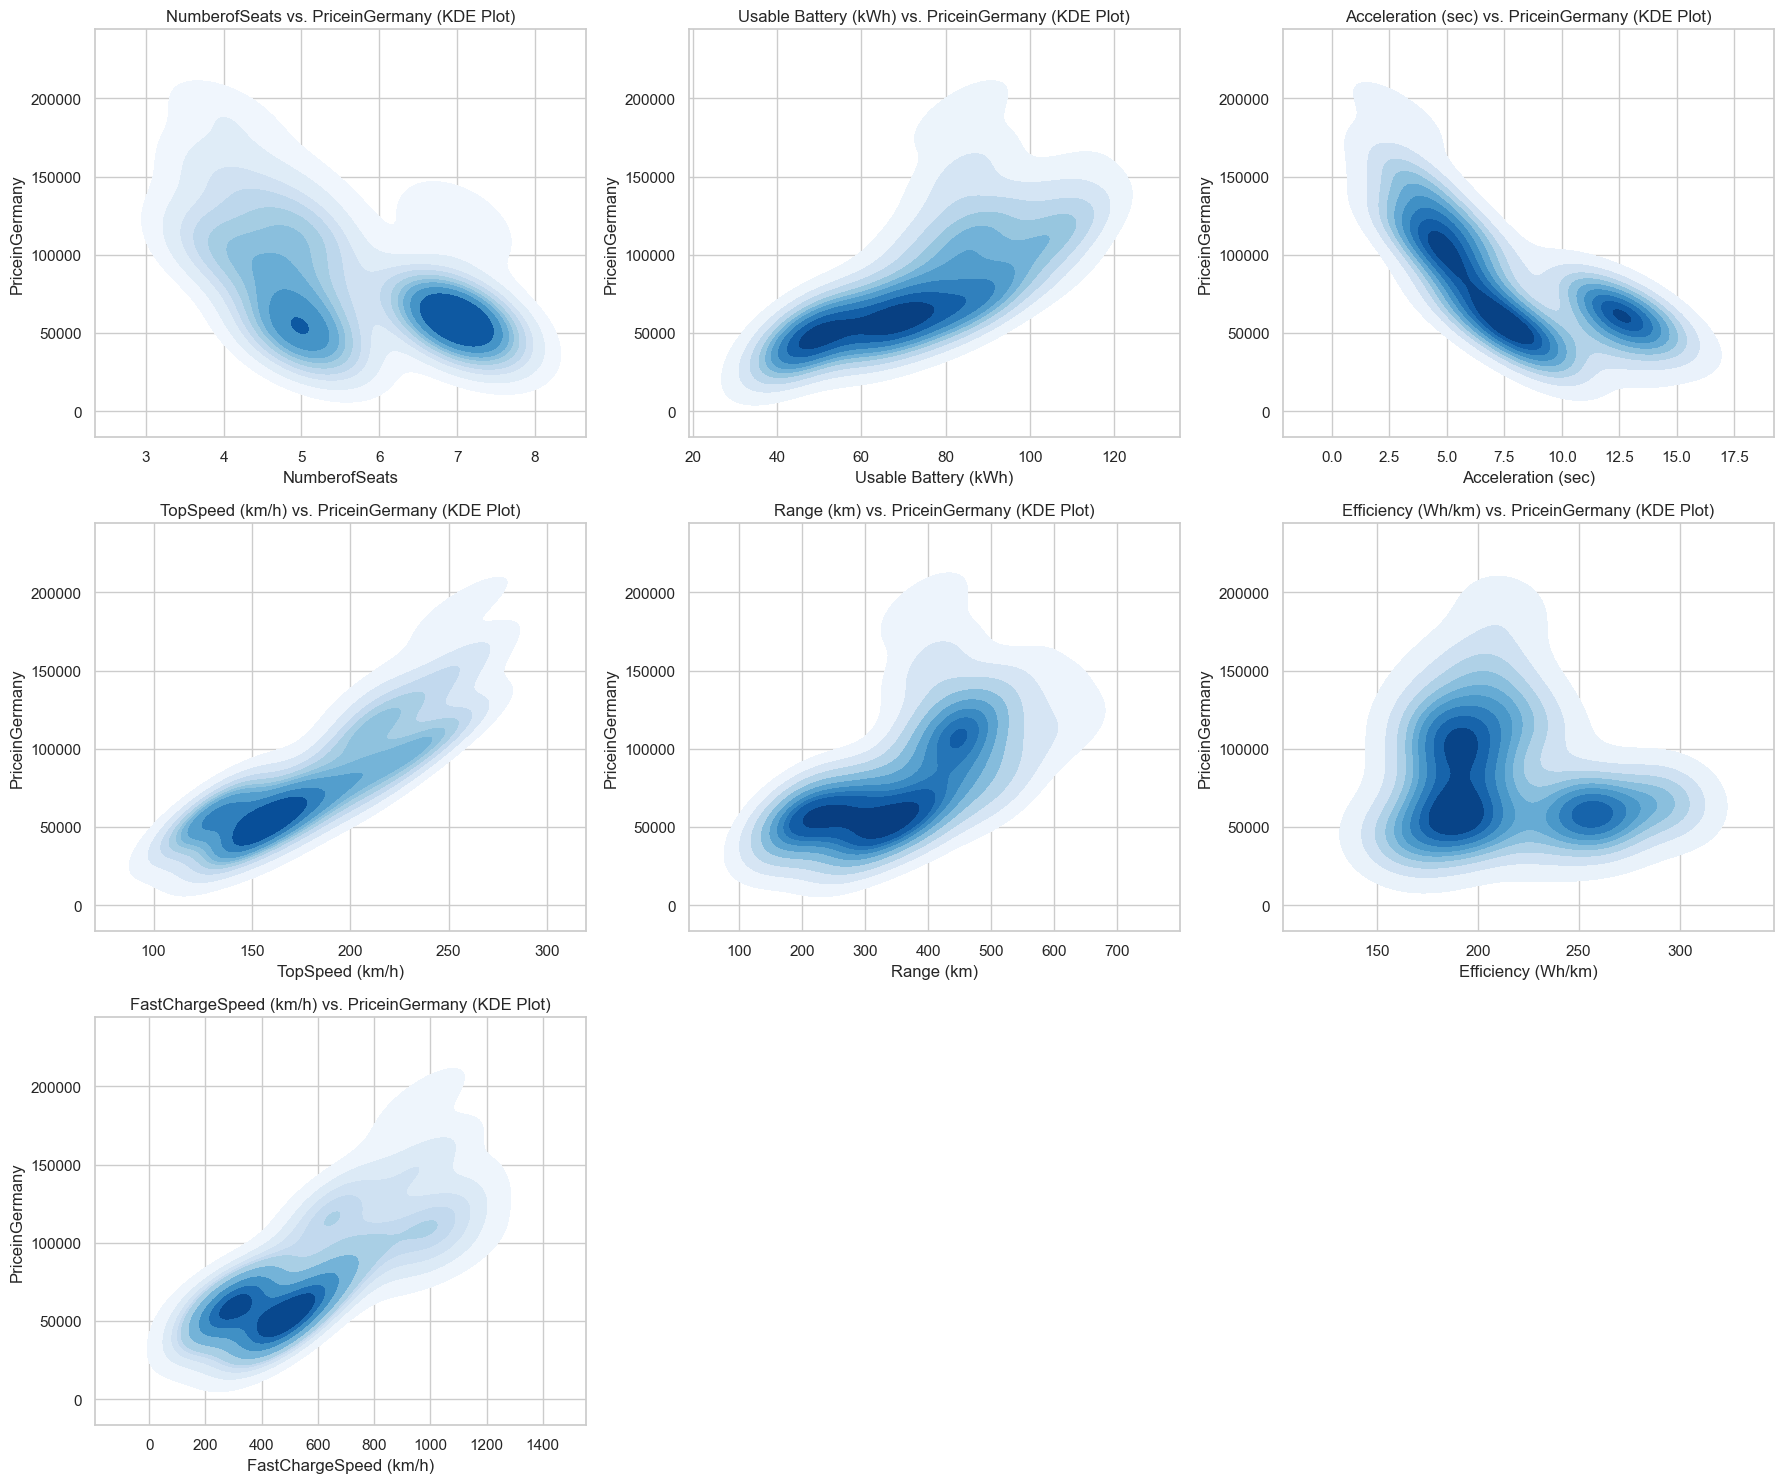

In [204]:
# Step 2: Define the grid layout (e.g., 3 columns, calculate rows dynamically)
n_cols = 3  # Number of columns
n_rows = int(np.ceil(len(numeric_df2.columns) / n_cols))  # Correct calculation for number of rows

# Step 3: Create subplots for all numeric variables vs PriceinGermany
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))  # Adjust size based on layout

# Step 4: Flatten axes array for easy iteration
axes = axes.flatten()

# Step 5: Generate KDE plots for each variable
for i, variable in enumerate(numeric_df2.columns):
    ax = axes[i]
    sns.kdeplot(x=top_df[variable], y=top_df[target_var], fill=True, cmap='Blues', ax=ax)
    ax.set_title(f'{variable} vs. {target_var} (KDE Plot)')
    ax.set_xlabel(variable)
    ax.set_ylabel(target_var)

# Step 6: Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplot spaces if any

# Step 7: Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## Bivariate Analysis Pair Plots

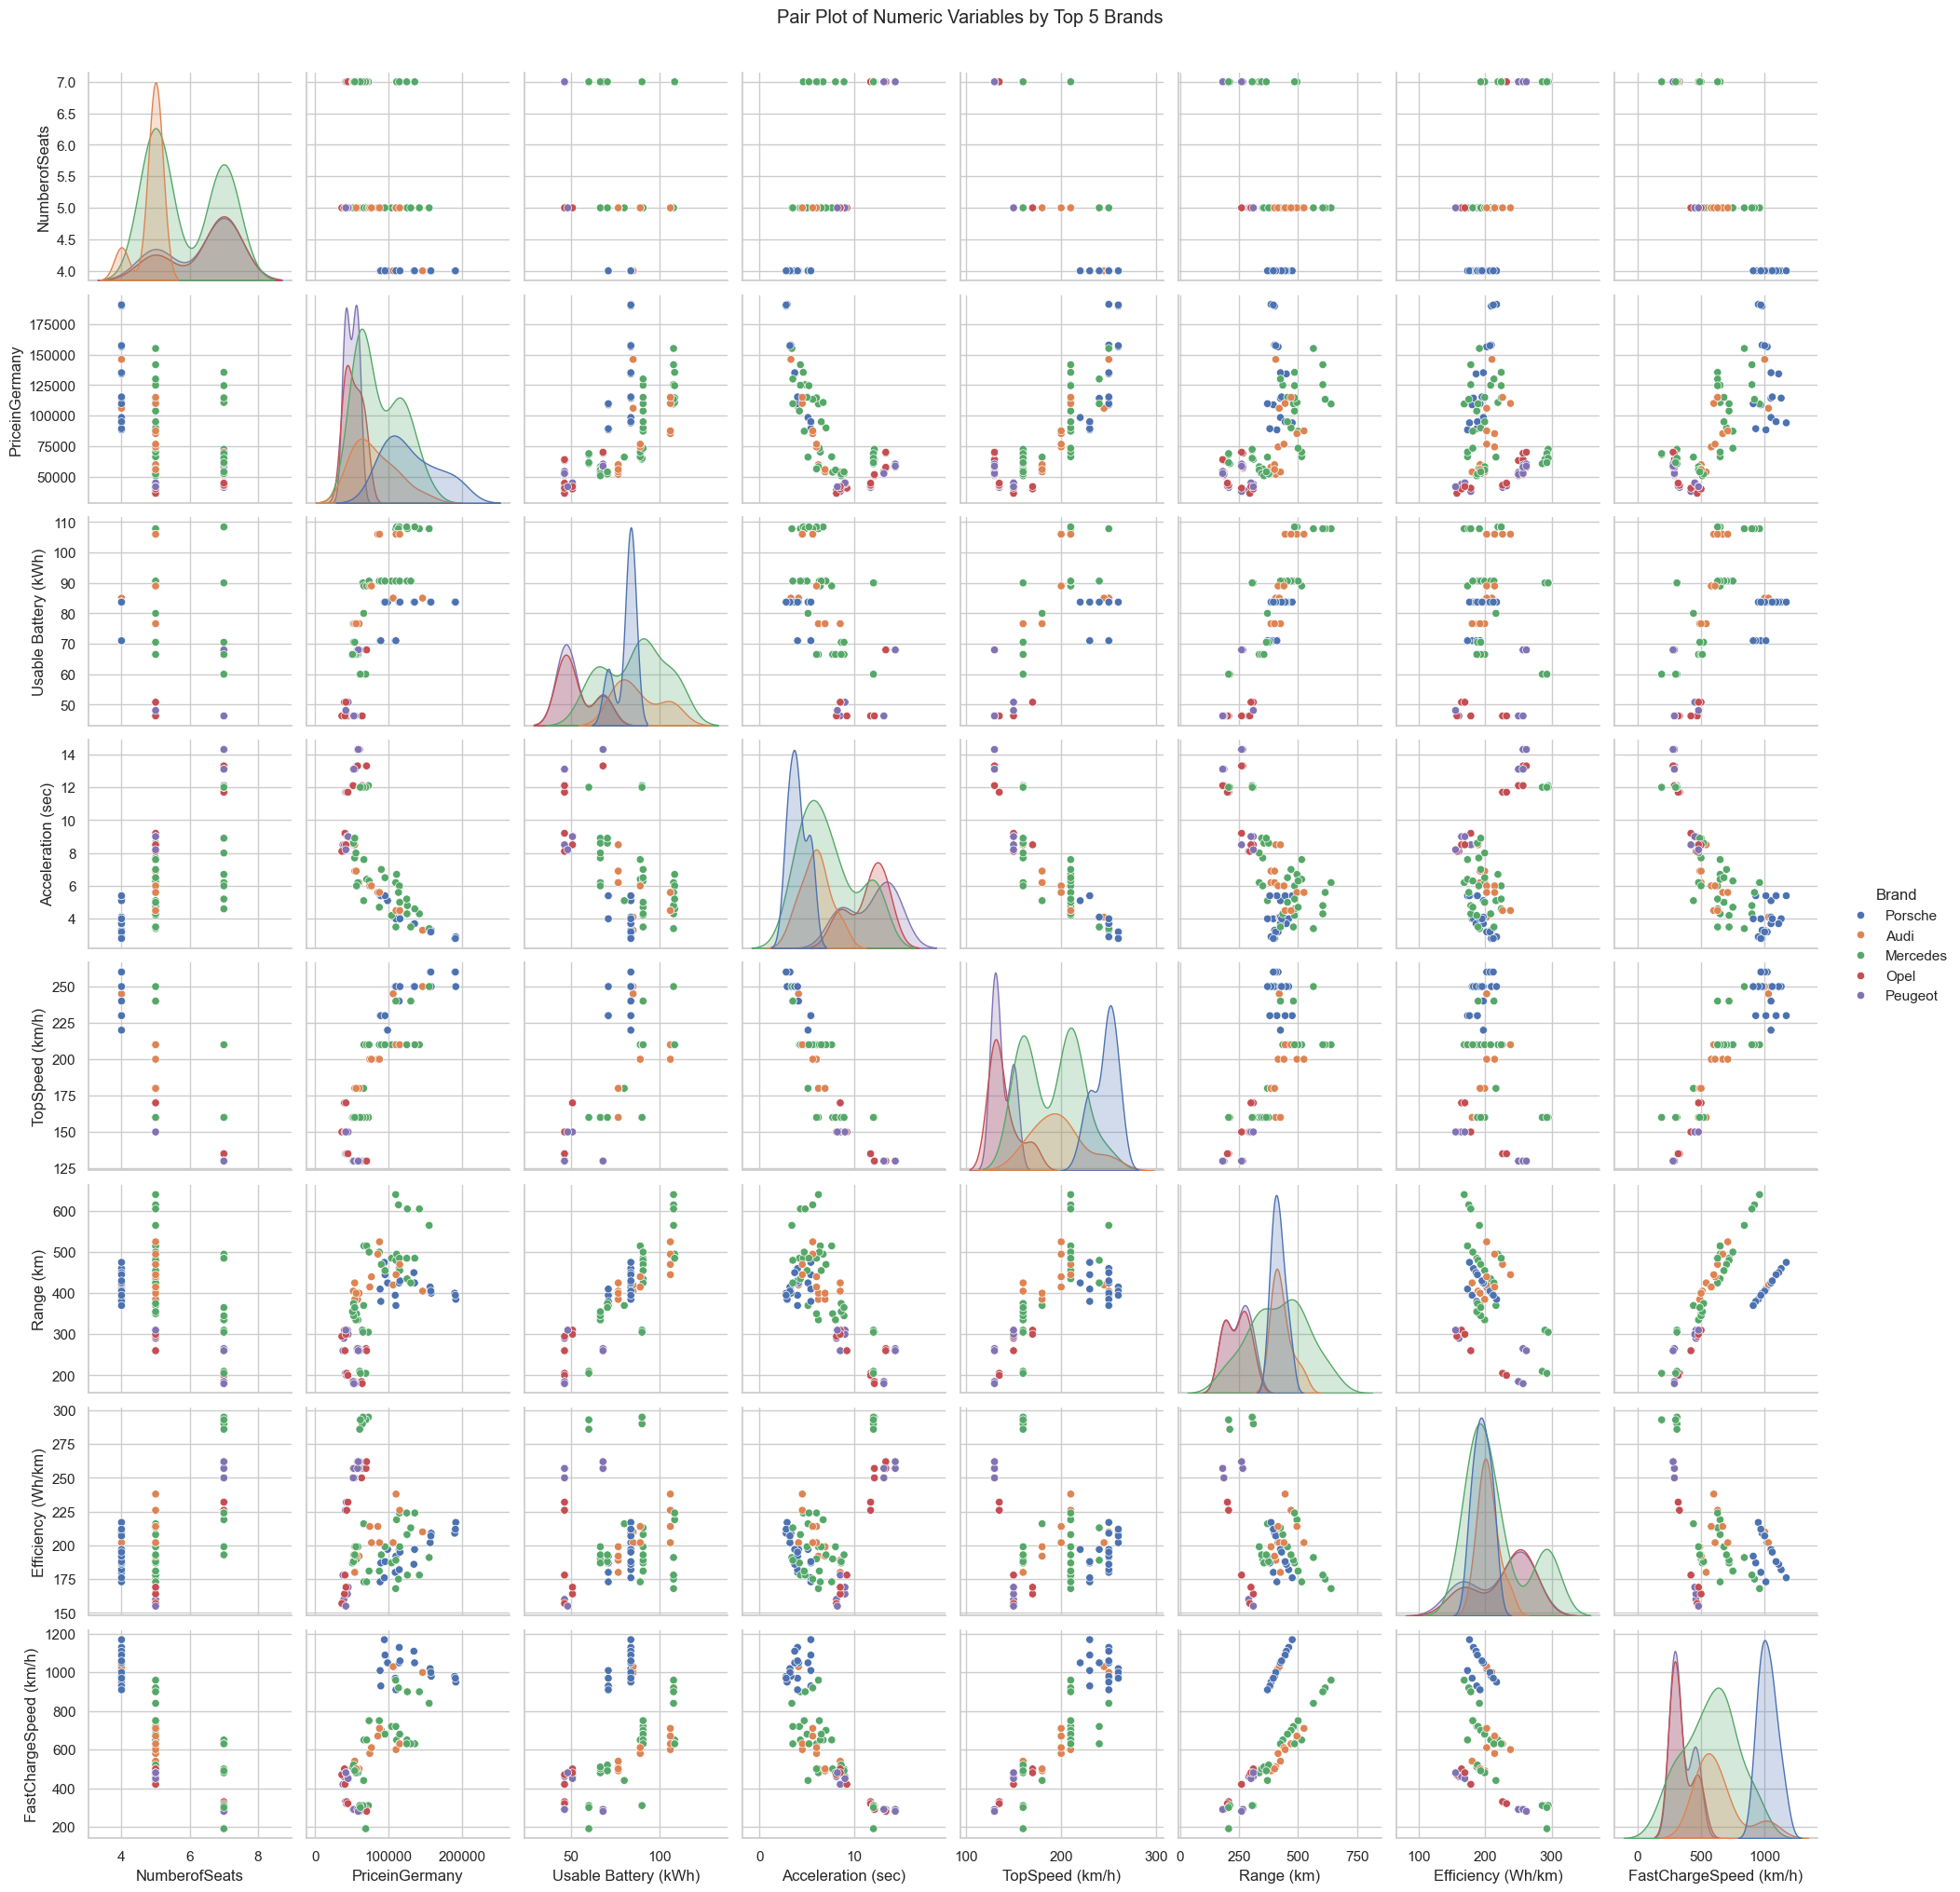

In [246]:
# Filter to include only the top 5 brands
top_brands = df['Brand'].value_counts().index[:5]
df_filtered = df[df['Brand'].isin(top_brands)]

# Pair plot for top 5 brands
sns.pairplot(df_filtered, hue='Brand')
plt.suptitle('Pair Plot of Numeric Variables by Top 5 Brands', y=1.02)
plt.show()

### Observations: 
- **Skewness, multicollinearity, check statistical assumptions and apply data transformation as needed before building models.**

### 3. Multiple Linear regression Predict Price
- **Question:** How sensitive is the price to all variables?
- **Objective:** Determine the factors influence price.

#### Preliminary Regression Model to see which factors influence price the most

In [315]:
# Step 1: Drop the "Name" column
df_dropped = df.drop(columns=['Name'])

# Step 2: Manually encode 'Drive' and target encode 'Brand'
df_dropped['Drive_encoded'] = df_dropped['Drive'].map({
    'All Wheel Drive': 2,
    'Front Wheel Drive': 1,
    'Rear Wheel Drive': 0
})

# Target encode the 'Brand' column based on 'PriceinGermany'
df_dropped['Brand_encoded'] = df_dropped.groupby('Brand')['PriceinGermany'].transform('mean')

# Drop the original 'Brand' and 'Drive' columns after encoding
df_encoded = df_dropped.drop(columns=['Brand', 'Drive'])

# Step 3: Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Step 4: Check for NaN values and data types
print("Data types of columns:\n", df_encoded.dtypes)  # Check column types
print("Missing values:\n", df_encoded.isnull().sum())  # Check for missing values

# Step 5: Drop rows with NaN values, as they can cause issues
df_encoded = df_encoded.dropna()

# Step 6: Select the features and target variable
X = df_encoded[['Usable Battery (kWh)', 'Acceleration (sec)', 'TopSpeed (km/h)', 'Range (km)', 
                'Efficiency (Wh/km)', 'FastChargeSpeed (km/h)', 'NumberofSeats', 'Drive_encoded', 
                'Brand_encoded']]

y = df_encoded['PriceinGermany']

# Step 7: Convert X and y to numpy arrays (to ensure they are fully numeric)
X = np.asarray(X)
y = np.asarray(y)

# Step 8: Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Step 9: Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Step 10: Print the summary of the regression results
print(model.summary())

Data types of columns:
 NumberofSeats               int64
PriceinGermany            float64
Usable Battery (kWh)      float64
Acceleration (sec)        float64
TopSpeed (km/h)           float64
Range (km)                float64
Efficiency (Wh/km)        float64
FastChargeSpeed (km/h)    float64
Brand_encoded             float64
Drive_encoded               int64
dtype: object
Missing values:
 NumberofSeats             0
PriceinGermany            0
Usable Battery (kWh)      0
Acceleration (sec)        0
TopSpeed (km/h)           0
Range (km)                0
Efficiency (Wh/km)        0
FastChargeSpeed (km/h)    0
Brand_encoded             0
Drive_encoded             0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     13

## Key Takeaways from the OLS Regression Results

1. **R-squared = 0.821**:
   - The model explains about **82.1%** of the variance in the dependent variable (`PriceinGermany`).
   - This indicates a strong model fit, though not perfect.

2. **Adjusted R-squared = 0.815**:
   - The adjusted R-squared accounts for the number of predictors in the model.
   - It's still a good value, indicating the model generalizes well beyond the training data.

3. **F-statistic and p-value (Prob > F)**:
   - **F-statistic = 137.1**: The independent variables collectively have a significant relationship with the dependent variable.
   - **p-value (4.05e-95)**: The very small p-value indicates the overall model is highly significant.

4. **Significant Coefficients (p < 0.05)**:
   - **x1 (`Usable Battery (kWh)`):** Positive coefficient (**964.67**), suggesting that an increase in battery capacity is associated with an increase in price.
   - **x2 (`Acceleration (sec)`):** Positive coefficient (**2020.36**), meaning faster acceleration (lower time in seconds) leads to higher prices.
   - **x3 (`TopSpeed (km/h)`):** Positive coefficient (**351.16**), meaning higher top speeds lead to higher prices.
   - **x8 (`Drive_encoded`):** Positive coefficient (**5904.15**), showing that a higher encoding (likely all-wheel drive) increases price significantly.
   - **x9 (`Brand_encoded`):** Positive coefficient (**0.6994**), meaning that brands with a higher average price (target encoded) are associated with higher vehicle prices.

5. **Non-Significant Variables (p > 0.05)**:
   - **x4 (`Range (km)`), x5 (`Efficiency (Wh/km)`), x6 (`FastChargeSpeed (km/h)`), x7 (`NumberofSeats`)**:
     - These variables do not have a statistically significant impact on price.

6. **Multicollinearity**:
   - **Condition Number = 1.84e+06**: This large condition number indicates potential multicollinearity. 
   - Multicollinearity can cause unreliable coefficient estimates and inflate standard errors.

7. **Durbin-Watson = 1.300**:
   - This value tests for autocorrelation in the residuals. Since 1.300 is below 2, there may be some positive autocorrelation in the residuals, though it is not severe.

8. **Skew and Kurtosis**:
   - **Skew = 0.593**: Indicates some asymmetry in the distribution of residuals.
   - **Kurtosis = 4.823**: Indicates heavier tails in the residual distribution (more outliers).

---

## Next Steps:

1. **Address Multicollinearity**:
   - Compute the **Variance Inflation Factor (VIF)** and remove or combine variables with high multicollinearity (VIF > 10).

2. **Recheck Model Fit**:
   - After addressing multicollinearity, refit the model to see if the coefficients and their significance improve.

3. **Consider Transformations**:
   - Consider **log transformations** to handle skewness and make the residuals more normally distributed.

4. **Residual Analysis**:
   - Perform **residual diagnostics** to check if the residuals are normally distributed and if there are any patterns in the residuals.